# Atividade 04 - Modelagem de problemas (Férias na Romênia)
- 202108075 – ANDRÉ LUIS ARAÚJO DE SOUZA<br>
- 202105848 – HUGO FERNANDES SILVA<br>
- 202105854 – LUCAS BRANDÃO RODRIGUES<br>
- 202105858 – MARCELO HENRIQUE LOPES FERREIRA<br>
- 202105865 – RAFAEL ALVES GOIAS<br>

### Descrição do problema

O problema "Férias na Romênia" é um exemplo clássico de aplicação do algoritmo de busca em grafos, apresentado no livro "Artificial Intelligence: A Modern Approach" de Peter Norvig e Stuart Russell.

Nesse problema, consideramos um turista que está planejando suas férias na Romênia e deseja visitar várias cidades. O objetivo é encontrar o caminho de menor custo (distância) que o turista deve percorrer para visitar todas as cidades desejadas e, eventualmente, retornar à cidade inicial. A Figura abaixo, extraída do livro citado, mostra o mapa rodoviário da Romênia contendo as distâncias, em KM, entre diversas cidades.

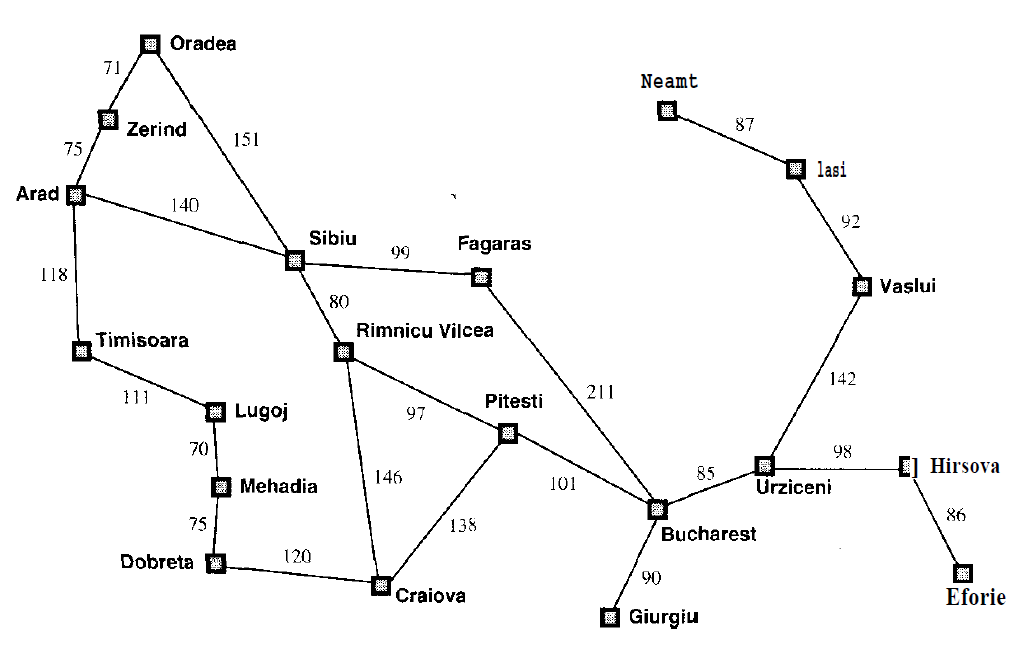


### Representação do problema

Na codificação a seguir, foi utilizada uma lista de adjacências para representar a conexão entre as cidades. A distância entre cada cidade é associada a cada aresta existente. Existem outras formas de representar o problema? Qual seria mais eficiente e em quais casos?

Sim, além da lista de adjacências, outra forma de representar o problema das férias na Romênia é utilizando a matriz de adjacências. A escolha da representação mais eficiente depende da quantidade de arestas existentes em relação ao número possível de arestas do grafo.

A lista de adjacências é uma representação adequada quando o grafo é esparso, ou seja, quando existem poucas conexões entre as cidades.

Já matrizes são melhores para grafos cheios (com muitas arestas), permitindo verificar rapidamente se duas cidades são adjacentes, sem muito uso redundante de memória (a maioria das posições da matriz são relevantes).


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# Definir as cidades
cities = [
    "Arad",
    "Bucareste",
    "Craiova",
    "Dobreta",
    "Eforie",
    "Fagaras",
    "Giurgiu",
    "Hirsova",
    "Iase",
    "Lugoj",
    "Mehadia",
    "Neamt",
    "Oradea",
    "Pitesti",
    "Rimnicu Vilcea",
    "Sibiu",
    "Timisoara",
    "Urziceni",
    "Vaslui",
    "Zerind"
]

# Definir as conexões entre as cidades
connections = [
    ("Arad", "Zerind", 75),
    ("Arad", "Sibiu", 140),
    ("Arad", "Timisoara", 118),
    ("Bucareste", "Fagaras", 211),
    ("Bucareste", "Giurgiu", 90),
    ("Bucareste", "Pitesti", 101),
    ("Bucareste", "Urziceni", 85),
    ("Craiova", "Dobreta", 120),
    ("Craiova", "Pitesti", 138),
    ("Craiova", "Rimnicu Vilcea", 146),
    ("Dobreta", "Mehadia", 75),
    ("Eforie", "Hirsova", 86),
    ("Fagaras", "Sibiu", 99),
    ("Hirsova", "Urziceni", 98),
    ("Iase", "Neamt", 87),
    ("Iase", "Vaslui", 92),
    ("Lugoj", "Mehadia", 70),
    ("Lugoj", "Timisoara", 111),
#        ("Neamt", "Vaslui", 142), # Aresta não existe no grafo
    ("Oradea", "Sibiu", 151),
    ("Oradea", "Zerind", 71),
    ("Pitesti", "Rimnicu Vilcea", 97),
    ("Rimnicu Vilcea", "Sibiu", 80),
    ("Urziceni", "Vaslui", 142)
]


def map():

    # Criar um grafo
    G = nx.Graph()

    # Adicionar nós (cidades) ao grafo
    for city in cities:
        G.add_node(city)

    # Adicionar arestas (conexões) ao grafo com as distâncias
    for connection in connections:
        city1, city2, distance = connection
        G.add_edge(city1, city2, weight=distance)

    # Posicionar os nós do grafo
    pos = nx.spring_layout(G, seed=42)

    # Plotar o grafo
    plt.figure(figsize=(10,10))

    nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold')
    edge_labels = nx.get_edge_attributes(G, 'weight')

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title('Grafo de Distâncias entre Cidades')
    plt.show()

    return G


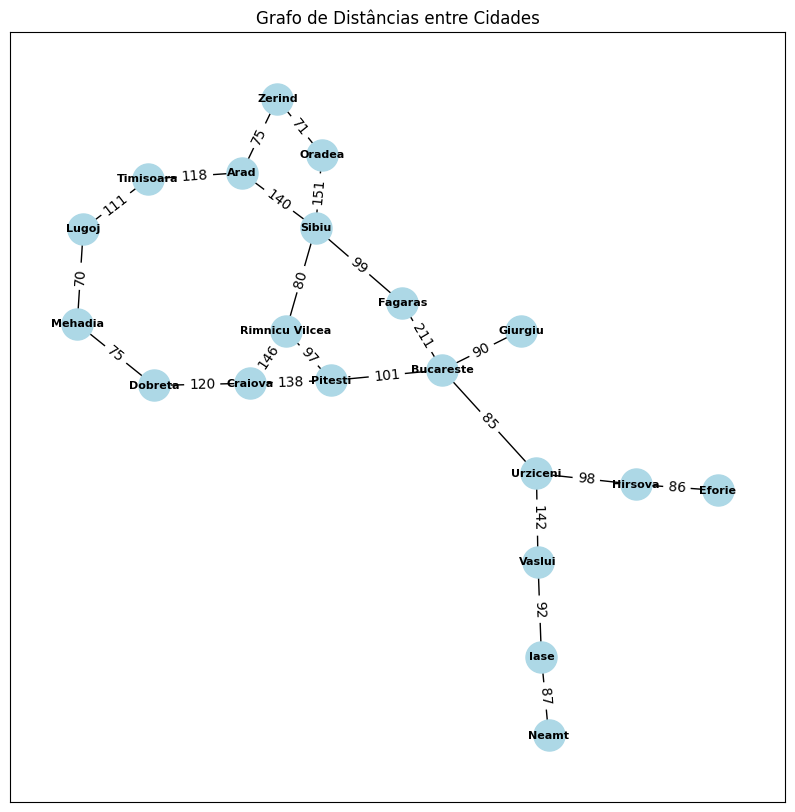

In [2]:
G = map()

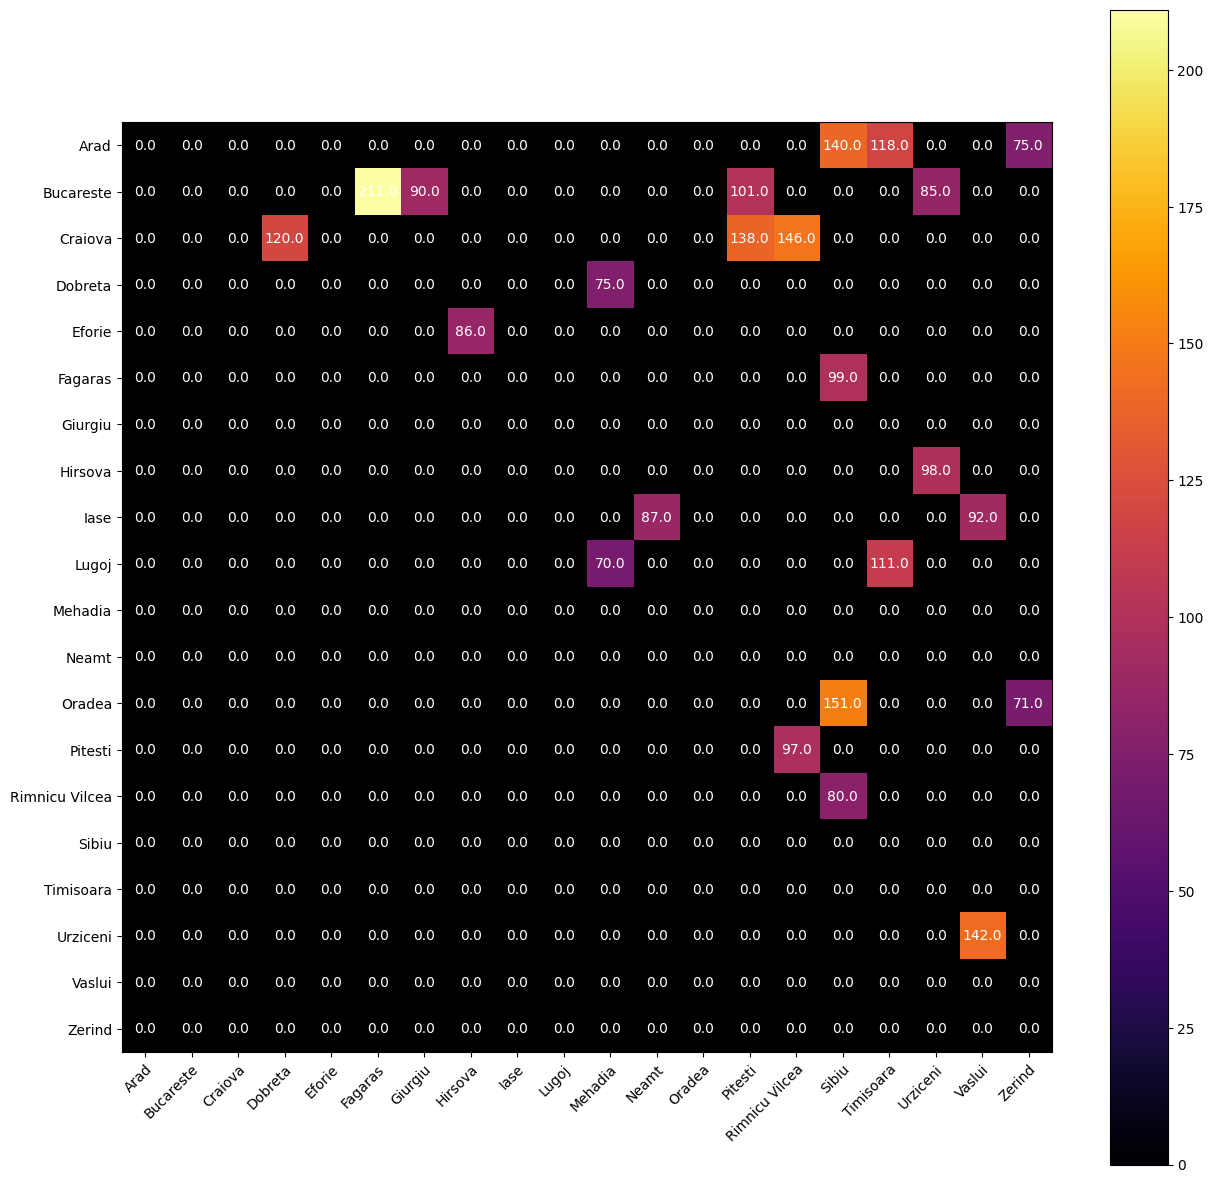

In [3]:

# Cria matriz de zeros tamanho (Qntd de Cidades X Qntd de Cidades)
matrix = np.zeros((len(cities), len(cities)))

# O valor 0 da coordenada (CidadeX, CidadeY) é atualizado para a distância entre (CidadeX, CidadeY)
for connection in connections:
    city1, city2, weight = connection
    city1_index = cities.index(city1)
    city2_index = cities.index(city2)
    matrix[city1_index][city2_index] = weight

fig, ax = plt.subplots(figsize=(15,15 ))
im = ax.imshow(matrix, cmap='inferno')
  
# Define quais cidades são quais linhas e colunas 
ax.set_xticks(np.arange(len(cities)))
ax.set_yticks(np.arange(len(cities)))
ax.set_xticklabels(cities)
ax.set_yticklabels(cities)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Adiciona o valor pra cada posição
for i in range(len(cities)):
    for j in range(len(cities)):
        text = ax.text(j, i, matrix[i, j], ha="center", va="center", color="w")

# Show color bar
fig.colorbar(im)

plt.show()

### Percorrer um caminho no mapa

Considerando o mapa exposto, a função a seguir implementa a construção de um caminho viável entre duas cidades. Contudo, não é utilizado um método para minimizar a distância percorrida. Veja que na simulação saindo de Arad e indo para Bucareste, a distância percorrida foi de 575Km, enquanto no trajeto passando por Arad-Sibiu-Rimnicu Vilcea o caminho é aproximadamente 27,5% mais curto. Implemente umas das heurísticas estudadas para determinar o caminho mínimo entre duas cidades, quaisquer que sejam elas. 

Qual algoritmo foi escolhido e por que? Como foi determinada a escolha pelo espaço de busca? A escolha do espaço de busca afetou a seleção do algoritmo?

O algoritmo escolhido foi o A* (A estrela). Ele foi escolhido por ser um algoritmo de busca informada que combina a busca em largura com o uso de uma heurística para determinar o menor caminho entre dois nós de um grafo.

A escolha pelo espaço de busca foi determinada pela estrutura do grafo, considerando os nós e as arestas que representam as conexões entre eles. O espaço de busca é definido pelos possíveis estados ou configurações do problema, ou seja, os nós do grafo que podem ser percorridos durante a busca pelo menor caminho.

A escolha do espaço de busca pode afetar a seleção do algoritmo, pois algoritmos diferentes podem ser mais eficientes ou adequados para diferentes tipos de problemas ou espaços de busca. O A* é uma escolha comum para problemas de menor caminho em grafos, principalmente quando se tem uma heurística que fornece informações sobre a distância estimada até o objetivo.

Para a resolução desse exercício, foi usada a tabela de distância euclidiana entre cada cidade e Bucareste:

<img src="https://i.imgur.com/hcR7RKg.png" alt="Image description" width="170" height="413">

In [4]:
## DICT

heuristica = {
    "Arad": 366,
    "Bucareste": 0,
    "Craiova": 160,
    "Dobreta": 242,
    "Eforie": 161,
    "Fagaras": 178,
    "Giurgiu": 77,
    "Hirsova": 151,
    "Iase": 226,
    "Lugoj": 244,
    "Mehadia": 241,
    "Neamt": 234,
    "Oradea": 380,
    "Pitesti": 98,
    "Rimnicu Vilcea": 193,
    "Sibiu": 253,
    "Timisoara": 329,
    "Urziceni": 80,
    "Vaslui": 199,
    "Zerind": 374,
}

In [5]:
def retorna_caminho(predecessors:dict):
      # Constrói o caminho percorrido até Bucareste
    caminho = []
    atual = "Bucareste"
    while atual:
        caminho.append(atual)
        atual = predecessors[atual]

    #ordem correta (start-->Bucarest)
    caminho.reverse()
    return caminho

In [6]:
import matplotlib.pyplot as plt

# somente para Bucareste
def astar(graph, start_city):
    # distancia registradas, detalhado melhor a seguir
    accumulated_distance_to = {city: float('inf') for city in graph.nodes}
    # marcando o caminho 
    predecessors = {city: None for city in graph.nodes}

    #armazenar as cidades visitadas, set para nao repetir
    visited_cities = set()

    # Define a distância inicial da cidade de partida como 0
    accumulated_distance_to[start_city] = 0

    # Fila de prioridade para armazenar os nós a serem visitados
    # Estrutura (fscore, cidade atual), comecando por 0 por ser o inicio
    queue = [(0, start_city)]  

    # enquanto fila não estiver vazia
    while queue:
        _, current_city = min(queue)  # visita o nó com menor f_score 
        queue.remove((_, current_city))  # Remove o nó da fila
        visited_cities.add(current_city)  # Marca o nó como visitado
        
        # Chegou ao destino, acaba
        if current_city == "Bucareste":
            break

        # Itera sobre as cidades vizinhas
        for neighbor in graph.neighbors(current_city):
            # se eu já visitei, continuo
            if neighbor in visited_cities:
                continue

            # custo do movimento para o vizinho
            custo_movimento_atual = graph[current_city][neighbor]['weight']

            # Calcula a distância total até o vizinho
            total_distance_atual = accumulated_distance_to[current_city] + custo_movimento_atual
            # se distancia calculada for menor que a já registrada
            if total_distance_atual < accumulated_distance_to[neighbor]:
                # Atualiza a distância e o predecessor do vizinho (quanto percorreu e onde)
                accumulated_distance_to[neighbor] = total_distance_atual

                predecessors[neighbor] = current_city

                # Calcula o f_score (distância total calculada + heurística)
                f_score = total_distance_atual + heuristica[neighbor]
                
                # Adiciona o vizinho na fila de prioridade
                queue.append((f_score, neighbor))
                

    caminho = retorna_caminho(predecessors)
    # Retorna o caminho e a distância total
    return caminho, accumulated_distance_to["Bucareste"]


In [7]:
start_city = "Arad"
path, distance = astar(G, start_city)

print("Cidades Visitadas:", path)
print("Distância total percorrida:", distance)

Cidades Visitadas: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucareste']
Distância total percorrida: 418


In [8]:
def tsp_travel(graph, start_city, end_city):
    # Lista para armazenar as cidades visitadas
    visited_cities = []

    # Adicionar a cidade inicial às cidades visitadas

    visited_cities.append(start_city)
    
    # Variável para armazenar a distância total percorrida
    total_distance = 0

    # Enquanto houver cidades não visitadas
    while True:
        current_city = visited_cities[-1]  # Última cidade visitada
        
        # Obter as cidades vizinhas não visitadas
        unvisited_neighbors = [neighbor for neighbor in graph.neighbors(current_city) if neighbor not in visited_cities]

        # Encontrar a cidade vizinha mais próxima
        next_city = min(unvisited_neighbors, key=lambda x: graph[current_city][x]['weight'])

        # Adicionar a cidade vizinha às cidades visitadas
        visited_cities.append(next_city)

        # Incrementar a distância total com a distância entre as cidades
        total_distance += graph[current_city][next_city]['weight']

        if  next_city == end_city:
            break

    # Retornar a lista de cidades visitadas e a distância total percorrida
    return visited_cities, total_distance

Determinação do Trajeto entre as cidades Arad e Bucareste

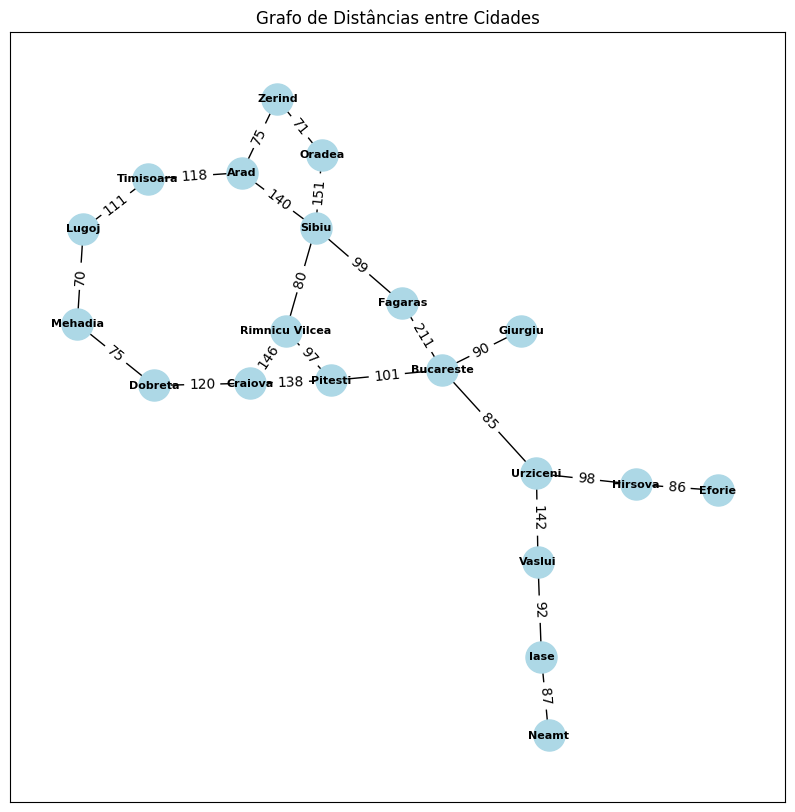

Cidades visitadas: ['Arad', 'Zerind', 'Oradea', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucareste']
Distância total percorrida: 575


In [9]:
G = map()
# Chamar o método para visitar todas as cidades a partir da cidade "Arad"
visited_cities, total_distance = tsp_travel(G, "Arad", "Bucareste")

# Imprimir o resultado
print("Cidades visitadas:", visited_cities)
print("Distância total percorrida:", total_distance)

## Solução geral do problema

Implemente uma das heurísticas estudadas para visitar todas as cidades do mapa no menor custo possível. 
A solução adotada é a mesma utilizada para encontrar o menor caminho entre duas cidades? E representação do espaço de busca? Detalhe a solução adotada

In [10]:
import networkx as nx
import numpy as np
import random

In [11]:
def expand_s(graph, s):
  new_s = []
  SIZE = len(s)
  edges = list(graph.edges())
  for i in range(SIZE - 1):
    actual_node = list(graph.nodes())[i]
    next_node = list(graph.nodes())[i+1]
    if (actual_node, next_node) in edges:
      new_s.append(actual_node)
    else:
      dks = nx.dijkstra_path(G, source=actual_node, target=next_node)
      new_s += dks[:-1]

  return new_s

def get_cost(graph, s):
  return sum(graph.get_edge_data(s[i], s[i+1])["weight"] for i in range(len(s)-1))

def swap(s):
  new_s = s.copy()  # Create a copy of the original list
  
  # Generate two random indices
  index1, index2 = random.sample(range(len(s)), 2)
  
  # Swap the items at the randomly selected indices in the new list
  new_s[index1], new_s[index2] = new_s[index2], new_s[index1]
  
  return new_s

In [12]:
def siman(graph, temperature, iter_t, cr, stop_temp = 0.1):
  
  s = list(graph.nodes())
  random.shuffle(s)
  s_ = expand_s(graph, s)
  cost = get_cost(graph, s_)
  while temperature > stop_temp:
    iter = 0
    while iter_t > iter:
      iter += 1
      ç = swap(s)
      ç_ = expand_s(graph, ç)
      cost_ = get_cost(graph, ç_)
      delta = cost_ - cost
      if delta < 0:
        cost = cost_
        s = ç
        s_ = ç_
      elif random.random() < np.exp(-delta/temperature):
        cost = cost_
        s = ç
    temperature *= (1- cr)

  cost = get_cost(graph, s_)
      
  return ss, cost

In [20]:
a, b = siman(G, 100, 10, 0.001, 0.0001)

In [21]:
print("Shortest Path:", a)
print("Shortest Distance:", b)

Shortest Path: ['Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucareste', 'Pitesti', 'Craiova', 'Dobreta', 'Craiova', 'Pitesti', 'Bucareste', 'Urziceni', 'Hirsova', 'Eforie', 'Hirsova', 'Urziceni', 'Bucareste', 'Fagaras', 'Bucareste', 'Giurgiu', 'Bucareste', 'Urziceni', 'Hirsova', 'Urziceni', 'Vaslui', 'Iase', 'Vaslui', 'Urziceni', 'Bucareste', 'Pitesti', 'Craiova', 'Dobreta', 'Mehadia', 'Lugoj', 'Mehadia', 'Dobreta', 'Craiova', 'Pitesti', 'Bucareste', 'Urziceni', 'Vaslui', 'Iase', 'Neamt', 'Iase', 'Vaslui', 'Urziceni', 'Bucareste', 'Pitesti', 'Rimnicu Vilcea', 'Sibiu', 'Oradea', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Rimnicu Vilcea', 'Sibiu', 'Arad', 'Timisoara', 'Arad', 'Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucareste', 'Urziceni', 'Vaslui', 'Urziceni', 'Bucareste', 'Pitesti', 'Rimnicu Vilcea', 'Sibiu', 'Arad']
Shortest Distance: 7530


Para esse problema, mudamos a heurística e o espaço de buscas. No espaço do problema anterior, podíamos tratar a posição apenas com a posição atual, uma vez que uma heuristica ja ia decidir pra onde seguir. Agora aqui precisamos avaliar o caminho por completo. Isso deixa o problema computacionalmente mais caro, uma vez que não existe uma solução trivial que não dependa de testar combinações.

Considerando isso, aplicamos uma metaheuristica em cima do problema conhecida como Simulated Annealing. Essa técnica consiste em iniciar o experimento com uma temperatura alta, onde a temperatura indica a probabilidade do algoritmo sair da solução atual e tentar explorar a vizinhança para evitar ótimos locais. Essa temperatura vai sendo reduzida com o passar do tempo.

Na nossa implementação, tratamos o espaço de busca como sendo um conjunto de caminhos possíveis, construídos a partir das 20 cidades. Aparentemente nosso algoritmo encontrou um ótimo local ou precisa ser debugado pois nos nossos testes rápidos que não chegaram a passar de 2 minutos, ele sempre devolveu a mesma resposta: 7530.

Como o prazo para entrega da atividade já está se encerrando, não conseguimos debugar o código mais a fundo, e nem tentar exploitar ele, mas uma maneira de fazer esse exploit seria achar na mão um caminho e passar ele como ponto de partida para o algoritmo. Mas ainda sim é estranho que ele sendo inicializado de maneira aleatória está devolvendo o mesmo 'mínimo local'.